# CS5489 - Tutorial 1
## Introduction to Jupyter and Python

Welcome to Jupyter (IPython Notebooks)!  In this tutorial you will get familiar with the Jupyter computing environment, and also practice writing a small Python program.

## Basics
Notebooks are organized by cells.  Each cell can hold either Markdown formatted text or Python code.  
- To create a new cell, use the "Insert" Menu.  
- Next, choose the cell type using the dropdown menu in the toolbar, or in the "Cell" -> "Cell Type" menu.  
- To "run" the cell, use the "Cell/Run" menu item, or push the "play" button on the toolbar.

Here are some useful keyboard shortcuts:
- [arrow keys] - move up or down cells
- b - create new cell below current one
- a - create new cell above current one
- dd - delete current cell
- m - change cell to Markdown (default is code)
- [enter] - edit cell
- [ctrl+enter] - render/run the current cell
- [shift+enter] - render/run the current cell, and move to the next cell.

**Tip**: In the tutorial and assignment ipynb files, it is okay to make additional code cells in the file.  This will allow you to work incrementally, and avoid re-running time-consuming code blocks.

## Playground
This cell is holding Markdown formatted text.  Here is a [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

The following cell holds Python code!  Select the cell, and press "play" to execute the code.  The output will appear below the code.

In [1]:
print("Hello World!")

Hello World!


The notebook remembers the current state of the environment.  Thus, variables and functions that are executed will persist.  Here is a variable.  Run the cell to initialize the variable.

In [2]:
x = 0
print(x)

0


Now try running the below cell several times.  You will see the value of `x` increase each time you run it.

In [3]:
x += 1
print(x)

1


To reset the environment, you need to restart the kernel by either: 1) using the "Kernel/Restart" menu; or 2) the "Refresh" button on the toolbar.  

If you restart the kernel and try to run the above cell, you will get an error because `x` is not defined yet. 

The outputs can also be cleared using "Cell/All output/Clear" menu item.

------

## Python program
In this section, you will write a small program to get familiar with Python.

The goal of the program is to count the number of factors (_not including 1 and the number itself_) for each number between 2 and 100.  For example, the number of factors of 2 is 0, and the number of factors for 4 is 1.

Here are two variables to get you started, `xs` stores the numbers from 2 to 100, and `fs` will store the factors for each number in `xs`.

In [4]:
xs = range(2,101)   # the number
fs = []             # store number of factors in this list

Write the program in the cell below.

In [5]:
# INSERT YOUR CODE HERE

In [6]:
fs = [len([i for i in range(2, x+1) if (x % i and x!=i)== 0]) for x in xs]

Now we will make some plots using `xs` and `fs`.  First, we need to initialize the matplotlib library.

In [7]:
# setup matplotlib display
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt     # import matplotlib

Write code to plot the number of factors (y-axis) vs the number (x-axis). Don't forget to label your axes!

In [8]:
# INSERT YOUR CODE HERE

Text(0, 0.5, 'Number of factors')

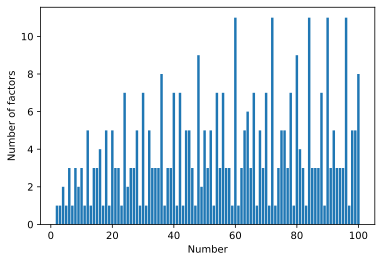

In [9]:
plt.bar(xs, fs)
plt.xlabel('Number')
plt.ylabel('Number of factors')

Next we will plot a histogram of the number of factors.

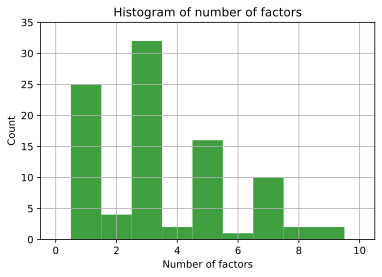

In [10]:
binedges = [i-0.5 for i in range(0,12)]    # first get the edges of bins
plt.hist(fs, binedges,                     # histogram plot (data, bins)
         facecolor='g', alpha=0.75, align='mid')  # appearance options
plt.xlabel('Number of factors')
plt.ylabel('Count')
plt.title('Histogram of number of factors')
plt.axis([-0.5, 10.5, 0, 35])  # set the axis (xmin, xmax, ymin, ymax)
plt.grid(True)

## Pickle
Next you will practice using pickle to load data from the file "data1.pickle".  The pickle is storing an ndarray object (numpy multi-dimensional array).  Load the pickle file and save its contents into a variable called `mydata`.


In [11]:
# INSERT YOUR CODE HERE

In [12]:
import numpy as np
mydata = np.load('data1.pickle', allow_pickle=True)

`mydata` is a 2-d array. Each row of the array is a "sample". Let's look at the shape of the array.

In [13]:
mydata.shape

(120, 2)

Inspecting the shape of the array, we see that there are 120 samples (rows). Each sample is a 2-dimensional vector (the number of columns).

Finally, let's visualise the data with a plot.  Treat the 1st dimension of the samples as the x-variable, and the 2nd dimension as the y-variable. In other words, plot the 1st column of the data vs. the 2nd column of the data.

In [14]:
# INSERT YOUR CODE HERE

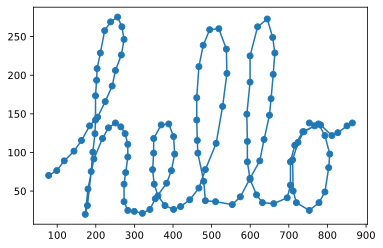

In [15]:
plt.plot(mydata[:,0], mydata[:,1], 'o-')

# Using Numpy 
Now we will practice using NumPy to implement the Gram-Schmidt process for orthonormalizing a set of vectors that span the same subspace. Recall that a set of vectors $\{\mathbf{e}_i\}_{i=1}^K$ are orthonormal if $\mathbf{e}_i^T \mathbf{e}_j = \begin{cases} 1, & i=j \\ 0, &i\neq j\end{cases}$.  That is, each vector $\mathbf{e}_i$ is orthogonal (90 degrees from) all other vectors $\mathbf{e}_j$, $j\neq i$, and all vectors are unit length $||\mathbf{e}_i||=1$.

## Gram-Schmidt process
Define the projection of vector $\mathbf{v}$ onto the direction of vector $\mathbf{u}$ as:
$P_{\mathbf{u}}(\mathbf{v}) = \frac{\mathbf{v}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}} \mathbf{u}$.

The Gram-Schmidt process for the set of vectors $\{\mathbf{v}_i\}_{i=1}^K$ is obtained in two steps. The first step produces a set of orthogonal vectors:
1. $\mathbf{u}_1 = \mathbf{v}_1$
2. $\mathbf{u}_2 = \mathbf{v}_2 - P_{\mathbf{u}_1}(\mathbf{v}_2)$
3. $\mathbf{u}_3 = \mathbf{v}_3 - P_{\mathbf{u}_1}(\mathbf{v}_3) - P_{\mathbf{u}_2}(\mathbf{v}_3)$
4. $\mathbf{u}_4 = \mathbf{v}_4 - P_{\mathbf{u}_1}(\mathbf{v}_4) - P_{\mathbf{u}_2}(\mathbf{v}_4)- P_{\mathbf{u}_3}(\mathbf{v}_4) $
5. ...
6. $\mathbf{u}_k = \mathbf{v}_k - \sum_{j=1}^{k-1} P_{\mathbf{u}_j}(\mathbf{v}_k)$

The second step computes the orthonormal vectors: $\mathbf{e}_k = \frac{\mathbf{u}_k}{||\mathbf{u}_k||}$.

Let $\mathbf{V} = [\mathbf{v}_1 \cdots \mathbf{v}_K]$ be a matrix of vectors. Write a function to orthonormalize the columns of an input matrix $V$, and return the result matrix $\mathbf{E} = [\mathbf{e}_1 \cdots \mathbf{e}_K]$.

In [16]:
from numpy import *

In [17]:
# INSERT YOUR CODE HERE

In [18]:
def myGS(V):
    E = zeros(V.shape)
    for i in range(V.shape[1]):
        E[:,i] = V[:,i]
        for j in range(i):
            E[:,i] = E[:,i] - dot(E[:,i],E[:,j])*E[:,j]
        E[:,i] = E[:,i]/linalg.norm(E[:,i]) 
    return E

Test your function with the following code. Here we assume the function is called `myGS`.

In [19]:
V = array([[1., 0, -1, 4], [-1, 2, 2, -1], [2, 3, 1, -3]]).transpose()
print(V)

[[ 1. -1.  2.]
 [ 0.  2.  3.]
 [-1.  2.  1.]
 [ 4. -1. -3.]]


In [20]:
E = myGS(V)
# print E matrix
print(E)

[[ 0.23570226 -0.22652742  0.82739338]
 [ 0.          0.74136248  0.46829625]
 [-0.23570226  0.59720866 -0.18059855]
 [ 0.94280904  0.20593402 -0.25199798]]


Your function is correct if $\mathbf{E}^T\mathbf{E}$ is the identity matrix $\mathbf{I} = \left[\begin{array}{c}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{array}\right]$.

In [21]:
# compute E^T E. it should be close to the identity matrix
print(E.transpose() @ E)

[[ 1.00000000e+00  8.32667268e-17 -2.77555756e-17]
 [ 8.32667268e-17  1.00000000e+00  5.55111512e-17]
 [-2.77555756e-17  5.55111512e-17  1.00000000e+00]]


# Getting Help

IPython has built-in help.  Here are some useful commands:
- `?` - introduction to IPython
- `object?` - info/help about an object, class, or module
- `object??` - even more details
- `%quickref` - quick reference for IPython magic functions (%)
- `%history` - show the history of the session
- tab-completion - hit tab to use auto-completion

In [22]:
plt?

Type:        module
String form: <module 'matplotlib.pyplot' from 'd:\\CS\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>
File:        d:\cs\anaconda\lib\site-packages\matplotlib\pyplot.py
Docstring:  
`matplotlib.pyplot` is a state-based interface to matplotlib. It provides
a MATLAB-like way of plotting.

pyplot is mainly intended for interactive plots and simple cases of
programmatic plot generation::

    import numpy as np
    import matplotlib.pyplot as plt

    x = np.arange(0, 5, 0.1)
    y = np.sin(x)
    plt.plot(x, y)

The object-oriented API is recommended for more complex plots.
